#Linear regression with two input variables
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `BloodPressure` and `BMI`?

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pima-diabetes.csv to pima-diabetes.csv


In [0]:
import pandas as pd
data = pd.read_csv('pima-diabetes.csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
# BloodPressure, BMI, Age
dataset = np.genfromtxt('pima-diabetes.csv', delimiter=",", skip_header = True, usecols=(2, 5, 7))


(768, 3)

[[72.  33.6 50. ]
 [66.  26.6 31. ]
 [64.  23.3 32. ]
 [66.  28.1 21. ]
 [40.  43.1 33. ]]


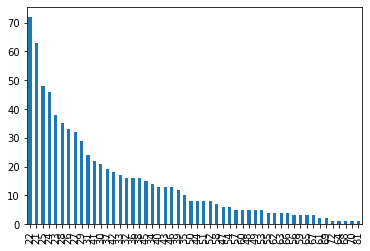

In [0]:
print(dataset.shape)
print('')
print(dataset[0:5])

#check what distribution of age distribution.
import matplotlib.pyplot as plt

plt.figure()
data['Age'].value_counts().plot(kind='bar')

#As you see the 'Age' column, you can determine that the data is imbalanced.

In [0]:
import plotly.express as px
import pandas as pd

d = {'Bloodpressure': dataset[:, 0], 'BMI': dataset[:, 1], 'Age': dataset[:, 2]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='Bloodpressure',  y='BMI', z='Age',  opacity = 0.4)
fig.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation='linear'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(dataset[:, 0:2], dataset[:, 2], epochs = 256, verbose = 0)

In [0]:
print('Model weights (w0, w1, and bias):')
# w = model.layers[0].get_weights()
# print(w)
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[0.28021982]
[0.3608225]
[1.3840138]


What is our model's equation?

In [0]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(dataset[:10, 2])
prediction = model.predict(dataset[:, 0:2])
print ('Prediction:')
print(prediction[0:5].T)

True Validation Data:
[50. 31. 32. 21. 33. 30. 26. 29. 53. 54.]
Prediction:
[[33.68 29.48 27.73 30.02 28.14]]


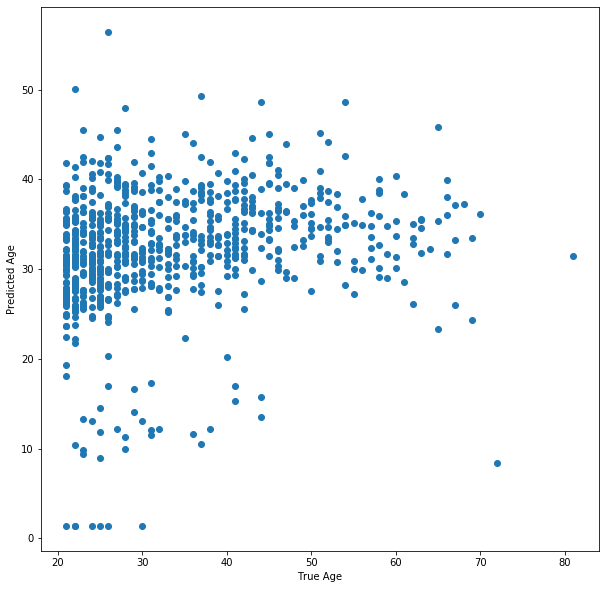

In [0]:
import matplotlib.pyplot as plt

# x = np.linspace(20, 80, num=10)
# y = x 
# plt.plot(x,y, '-', color = 'red')

plt.figure(figsize=(10,10))
plt.scatter(dataset[:, 2], prediction)
plt.ylabel('Predicted Age')
plt.xlabel('True Age')
plt.show()

# This look for performace of the model

Are these predictions reasonable? How did you verify?